# NumPy Basics: Arrays and Vectorized Computation

In [46]:
%matplotlib inline

In [2]:
from __future__ import division
from numpy.random import randn
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## The NumPy ndarray: a multidimensional array object

In [3]:
data = randn(2, 3)

In [4]:
data
data * 10
data + data

array([[-1.2197, -1.0867, -0.1567],
       [-1.0598,  0.6901, -0.3258]])

In [5]:
data.shape
data.dtype

dtype('float64')

### Creating ndarrays

In [6]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([ 6. ,  7.5,  8. ,  0. ,  1. ])

In [7]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2
arr2.ndim
arr2.shape

(2, 4)

In [8]:
arr1.dtype
arr2.dtype

dtype('int32')

In [9]:
np.zeros(10)
np.zeros((3, 6))
np.empty((2, 3, 2))

array([[[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]]])

In [10]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### Data Types for ndarrays

In [4]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print(arr1.dtype)
print(arr2.dtype)

float64
int32


In [16]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [22]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([  3.7,  -1.2,  -2.6,   0.5,  12.9,  10.1])

In [23]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [18]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([  1.25,  -9.6 ,  42.  ])

In [19]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype) # dtype의로 기존의 존재하는 배열의 데이터 타입을 가져다 씀!! astype

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [24]:
empty_uint32 = np.empty(8, dtype='u4') # 공간 8개에 dtype의 u4로 했는데 
empty_uint32

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

### Operations between arrays and scalars

In [29]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]]) # 2차원임!! 2x3이지!!!
arr
arr * arr
arr - arr

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [30]:
print(1 / arr)
print(arr ** 0.5) # sqrt 이지!!

[[ 1.      0.5     0.3333]
 [ 0.25    0.2     0.1667]]
[[ 1.      1.4142  1.7321]
 [ 2.      2.2361  2.4495]]


### Basic indexing and slicing

In [6]:
arr = np.arange(10)
print(arr)
print(arr[5])
print(arr[5:8]) 
arr[5:8] = 12 # 이런식으로 insert도 하네!!! broadcastring 이라고 부른다 이런 방식!!
print(arr)

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]


In [7]:
arr_slice = arr[5:8]

여기서 arr_slice를 뷰라고 부른다. 뷰 수정하면 **원본도 수정된다!!!!!**

In [8]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,     9])

In [9]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

만약에 뷰 대신 ndarray 슬라이스의 복사본을 얻고 싶다면 arr[5:8].copy()를 사용해서 명시적으로 배열을 복사하면 된다.
***

In [12]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [46]:
print(arr2d[0][2])
print(arr2d[0, 2]) # 같네!!

3
3


In [47]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [48]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [51]:
old_values = arr3d[0].copy() # 값을 대피시켜두고!!!
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [50]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [52]:
arr3d[1, 0]

array([7, 8, 9])

#### Indexing with slices
축에대허서 주의해야한다. 행,열 / 표,행,열 이런식으로 가지 0,1,2 축...

In [10]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [13]:
arr2d
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [14]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [15]:
arr2d[1, :2]

array([4, 5])

In [64]:
arr2d[2, :1]

array([7])

In [65]:
arr2d[:, :1] # 별개별개로 출력이 되었네!!

array([[1],
       [4],
       [7]])

In [70]:
arr2d[:, :1].reshape(-1) 

array([1, 4, 7])

In [63]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Boolean indexing

In [86]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = randn(7, 4)
print(names)
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[-0.764   0.0195 -1.164  -1.11  ]
 [ 0.5298 -1.6165  1.8262 -0.197 ]
 [-0.8278  1.3311 -0.0279 -0.1703]
 [ 1.262  -0.1973 -1.4087  0.3256]
 [ 0.2002  0.8003 -0.7941 -0.6155]
 [ 1.0707 -0.1037 -0.2209  0.022 ]
 [-0.3307  0.3751 -0.061   0.6156]]


In [87]:
names == 'Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [88]:
data[names == 'Bob'] # 조건으로 행을 select 하네!!

array([[-0.764 ,  0.0195, -1.164 , -1.11  ],
       [ 1.262 , -0.1973, -1.4087,  0.3256]])

In [89]:
data[names == 'Bob', 2:]
data[names == 'Bob', 3]

array([-1.11  ,  0.3256])

In [90]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True], dtype=bool)

In [91]:
data[~(names == 'Bob')]

array([[ 0.5298, -1.6165,  1.8262, -0.197 ],
       [-0.8278,  1.3311, -0.0279, -0.1703],
       [ 0.2002,  0.8003, -0.7941, -0.6155],
       [ 1.0707, -0.1037, -0.2209,  0.022 ],
       [-0.3307,  0.3751, -0.061 ,  0.6156]])

In [92]:
mask = (names == 'Bob') | (names == 'Will') # or지!!
mask
data[mask]

array([[-0.764 ,  0.0195, -1.164 , -1.11  ],
       [-0.8278,  1.3311, -0.0279, -0.1703],
       [ 1.262 , -0.1973, -1.4087,  0.3256],
       [ 0.2002,  0.8003, -0.7941, -0.6155]])

In [94]:
data[data < 0] = 0 # 조건 후 값 변경까지 한번에 하네!!!
data

array([[ 0.    ,  0.0195,  0.    ,  0.    ],
       [ 0.5298,  0.    ,  1.8262,  0.    ],
       [ 0.    ,  1.3311,  0.    ,  0.    ],
       [ 1.262 ,  0.    ,  0.    ,  0.3256],
       [ 0.2002,  0.8003,  0.    ,  0.    ],
       [ 1.0707,  0.    ,  0.    ,  0.022 ],
       [ 0.    ,  0.3751,  0.    ,  0.6156]])

In [83]:
data[names != 'Joe'] = 7
data

array([[ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 0.438 ,  0.7184,  0.    ,  0.    ],
       [ 0.1454,  0.8364,  0.    ,  0.8171]])

### Fancy indexing (정수 배열을 사용!!)

In [25]:
arr = np.empty((8, 4)) # 초기화를 안해서 쓰레기 값들이 들어 있는 거다!!
arr

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [26]:
for i in range(8):
    arr[i] = i
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [27]:
arr[[4, 3, 0, 6]] 

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

In [28]:
arr[[4, 3, 0, 6], :1] 

array([[ 4.],
       [ 3.],
       [ 0.],
       [ 6.]])

In [29]:
arr[[-3, -5, -7]]

array([[ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

In [30]:
# more on reshape in Chapter 12
arr = np.arange(32)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [31]:
arr = np.arange(32).reshape((8, 4)) # 8행 4열로 바꿔라!!!
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [32]:
arr[[1,5,7,2],[0,3,1,2]] # 각각의 행열로 뽑아내내!! (1,0)(5,3),(7,1),(2,2)
                         # 과정을 생각하면 행을 먼저 고르고 그 안에서 열을 선택하네!!

array([ 4, 23, 29, 10])

In [33]:
arr[[1,5,7,2][0,3,1,2]]

TypeError: list indices must be integers or slices, not tuple

In [122]:
arr[[1,5,7,2]]

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

In [126]:
arr[[1,5,7,2],[0]]

array([ 4, 20, 28,  8])

In [127]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]] # 1,5,7,2 행에서 전체행의 다음 0,3,1,2 순서대로 열을 선택해라!!

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [132]:
arr[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

- 위 두 방식 다 같은거다!! np.ix_ 도 쓸 수 있지!!!
- 팬시 색인은 슬라이싱과는 달리 선택된 데이터를 새로운 배열로 복사한다!!

책에 없는 내용 실습

In [143]:
ar = np.arange(8)

In [144]:
ar

array([0, 1, 2, 3, 4, 5, 6, 7])

In [145]:
ar.shape[0] # column 개수를 뽑아주네!!

8

In [146]:
ar[3:7]

array([3, 4, 5, 6])

In [147]:
ar[[3,5,2,1]]

array([3, 5, 2, 1])

In [148]:
ar2 = ar.reshape(2,4)
ar2

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [150]:
ar2.shape # 2차원이이 0축은 행이지!!

(2, 4)

In [154]:
print(ar2.shape[0])
print(ar2.shape[1])

2
4


In [156]:
ar3 = np.arange(60)
ar3

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [162]:
ar3 = ar3.reshape(3,5,4) # 3표 5행 4열 / 차원이 추가될 수 록 기존의 축이 뒤로 밀려난다고 생각해라!!!

In [163]:
ar3

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]],

       [[20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31],
        [32, 33, 34, 35],
        [36, 37, 38, 39]],

       [[40, 41, 42, 43],
        [44, 45, 46, 47],
        [48, 49, 50, 51],
        [52, 53, 54, 55],
        [56, 57, 58, 59]]])

In [165]:
ar3[:2] #indexing을 하면 차원이 줄어들고, slicing을 하면 차원은 그대로 이고!!!

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]],

       [[20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31],
        [32, 33, 34, 35],
        [36, 37, 38, 39]]])

In [168]:
ar3[1][2:4,:] # ar3[1][2:4]

array([[28, 29, 30, 31],
       [32, 33, 34, 35]])

In [171]:
ar3[[1,2],[4,2],[0,1]] # 2표 5행 1열 값과 3표 3행 2열 값을 뽑은다.

array([36, 49])

In [172]:
ar3

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]],

       [[20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31],
        [32, 33, 34, 35],
        [36, 37, 38, 39]],

       [[40, 41, 42, 43],
        [44, 45, 46, 47],
        [48, 49, 50, 51],
        [52, 53, 54, 55],
        [56, 57, 58, 59]]])

In [183]:
ar3[np.ix_([1,2],[4,2],[0,1])] # 뭐지...?!?! TODO:: 2표3표 에서 5행3행 전체에서 1열2열 전체 순서도 적용이 되네!!!

array([[[36, 37],
        [28, 29]],

       [[56, 57],
        [48, 49]]])

In [197]:
ar3[[1,2]][[4,2]] todo::

#[[4,2],[0,1]] # 이걸로 바꾸면 어떻게 되지...
# 1,5,7,2 행에서 전체행의 다음 0,3,1,2 순서대로 열을 선택해라!! TODO::

array([[[36, 37, 38, 39],
        [28, 29, 30, 31]],

       [[56, 57, 58, 59],
        [48, 49, 50, 51]]])

In [178]:
arr = np.arange(60)

In [179]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [180]:
arr.shape

(60,)

In [186]:
arrz = arr.reshape(60, 1)
arrz

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59]])

### Transposing arrays and swapping axes

In [188]:
arr = np.arange(15).reshape((3, 5))
print(arr)
print(arr.T)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


In [198]:
arr = np.random.randn(6, 3)
np.dot(arr.T, arr) # 행열의 곱이다!!

array([[ 4.6503, -1.2879, -3.5052],
       [-1.2879,  8.7993,  1.5706],
       [-3.5052,  1.5706,  4.5982]])

In [245]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [246]:
arr.transpose((1, 0, 2)) # 0번축에 1번 / 1번축에 0번 / 2번축에 2번이 오게한다. 축을 바꾸겠다!!!

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [247]:
arr.transpose((2, 1, 0)) # 2표 2행 4열 => 4표 2행 2열로 바꾸어라!!!!! 

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

In [248]:
arr.transpose((2,0,1)) # 열값을 표로 / 표값을 행으로 / 행값을 열로 해라! 
                       # 햇갈려서 3차원 transepose는 잘 안쓴다고 한다...
                       # 하나 찍어서 보면 햇갈리지 않는다!!

array([[[ 0,  4],
        [ 8, 12]],

       [[ 1,  5],
        [ 9, 13]],

       [[ 2,  6],
        [10, 14]],

       [[ 3,  7],
        [11, 15]]])

In [210]:
arr # 원본 배열은 바뀌지 않음!!

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [211]:
arr.swapaxes(1, 2) # 맞바꿀 축을 지정하네!! 1,2 축을 서로 맞바꿔라!!!
                   # 표는 그대로 행과 열을 맞바꾸어라!!!

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## Universal Functions: Fast element-wise array functions
배열에 있는 모든 값에 적용되는 함수를 universal funcation이라고 한다!!!

In [212]:
arr = np.arange(10)
print(np.sqrt(arr))
print(np.exp(arr))

[ 0.      1.      1.4142  1.7321  2.      2.2361  2.4495  2.6458  2.8284
  3.    ]
[    1.         2.7183     7.3891    20.0855    54.5982   148.4132
   403.4288  1096.6332  2980.958   8103.0839]


In [214]:
x = randn(8)
y = randn(8)
print(x)
print(y)
np.maximum(x, y) # element-wise maximum

[ 0.6609 -1.1604  0.7046 -0.7658  0.2579  1.2974 -1.221   0.0089]
[ 0.389   1.7497  0.2006  1.1886  3.3018 -0.9124 -1.086  -1.3515]


array([ 0.6609,  1.7497,  0.7046,  1.1886,  3.3018,  1.2974, -1.086 ,
        0.0089])

In [226]:
arr = randn(7) * 5
print(arr)
np.modf(arr) # 결과 2개 반환하네, tuple로 반환한다!! 몫과 나머지를 return

[ -6.3911  11.0503  -1.1213  -4.7228  -4.3532  -0.124    0.1209]


(array([-0.3911,  0.0503, -0.1213, -0.7228, -0.3532, -0.124 ,  0.1209]),
 array([ -6.,  11.,  -1.,  -4.,  -4.,  -0.,   0.]))

#### 다시 연습 축!!

In [228]:
arr = np.arange(20)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [229]:
arr.shape

(20,)

In [230]:
arr[5:9]

array([5, 6, 7, 8])

In [232]:
arr = arr.reshape(4,5)
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [233]:
arr.shape

(4, 5)

In [234]:
print(arr.shape[0],arr.shape[1])

4 5


In [235]:
arr[2] # 이건 slicing이 아니고 indexing이지!!

array([10, 11, 12, 13, 14])

In [236]:
arr = np.arange(60).reshape(4,3,5)
arr

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]],

       [[15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]],

       [[30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44]],

       [[45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59]]])

In [241]:
arr = np.arange(15).reshape(3,5)
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [243]:
arr.transpose(1,0) # 0축 행과 1축 열을 바꿔줌!!

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

## Data processing using arrays

In [263]:
points = np.arange(-3, 3, 1) # 1000 equally spaced points -5~5까지 0.01 단위로!!!
points

array([-3, -2, -1,  0,  1,  2])

In [264]:
xs, ys = np.meshgrid(points, points)
print(xs)
print(ys) # x축 y축 값을 뽑아주네...

[[-3 -2 -1  0  1  2]
 [-3 -2 -1  0  1  2]
 [-3 -2 -1  0  1  2]
 [-3 -2 -1  0  1  2]
 [-3 -2 -1  0  1  2]
 [-3 -2 -1  0  1  2]]
[[-3 -3 -3 -3 -3 -3]
 [-2 -2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0]
 [ 1  1  1  1  1  1]
 [ 2  2  2  2  2  2]]


In [265]:
from matplotlib.pyplot import imshow, title

In [266]:
import matplotlib.pyplot as plt

In [267]:
z = np.sqrt(xs ** 2 + ys ** 2) #
z

array([[ 4.2426,  3.6056,  3.1623,  3.    ,  3.1623,  3.6056],
       [ 3.6056,  2.8284,  2.2361,  2.    ,  2.2361,  2.8284],
       [ 3.1623,  2.2361,  1.4142,  1.    ,  1.4142,  2.2361],
       [ 3.    ,  2.    ,  1.    ,  0.    ,  1.    ,  2.    ],
       [ 3.1623,  2.2361,  1.4142,  1.    ,  1.4142,  2.2361],
       [ 3.6056,  2.8284,  2.2361,  2.    ,  2.2361,  2.8284]])

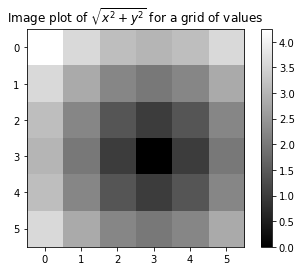

In [268]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
# 각 점에서의 원점까지의 거리를 구한 것이다!! 2차원이었네!! 

In [255]:
plt.draw()

### Expressing conditional logic as array operations

In [36]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [38]:
list(zip(xarr, yarr, cond))

[(1.1000000000000001, 2.1000000000000001, True),
 (1.2, 2.2000000000000002, False),
 (1.3, 2.2999999999999998, True),
 (1.3999999999999999, 2.3999999999999999, True),
 (1.5, 2.5, False)]

In [39]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

In [41]:
result = np.where(cond, xarr, yarr) # sql의 where와는 다르다!! (조건식, 참이면 이거, 거짓이면 이거)
result

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

In [49]:
arr = np.random.randn(4, 4)
arr

array([[-0.48960138, -0.28595083, -0.57249486, -0.16155823],
       [-0.31656544, -0.88681344, -0.24770324,  2.23573168],
       [ 0.96331597, -0.16636906, -1.29930657,  1.03841004],
       [ 0.695221  ,  1.03695501, -0.94772994,  0.0447237 ]])

In [51]:
np.where(arr > 0, 2, -2)

array([[-2, -2, -2, -2],
       [-2, -2, -2,  2],
       [ 2, -2, -2,  2],
       [ 2,  2, -2,  2]])

In [53]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-0.48960138, -0.28595083, -0.57249486, -0.16155823],
       [-0.31656544, -0.88681344, -0.24770324,  2.        ],
       [ 2.        , -0.16636906, -1.29930657,  2.        ],
       [ 2.        ,  2.        , -0.94772994,  2.        ]])

In [54]:
1 == True

True

In [ ]:
# Not to be executed
result = 0 * (cond1 & cond2) + 1 * (cond1 & ~cond2) + 2 * (~cond1 & cond2) + 3 * (~cond1 & ~cond2)

### Mathematical and statistical methods

In [59]:
arr = np.random.randn(5, 4) # normally-distributed data
arr

array([[ 0.08095023,  1.39114556,  1.24256143, -0.3486026 ],
       [ 0.58503816, -0.62526908, -1.87099285,  0.11767793],
       [-0.72618748,  0.49641474,  1.49459726,  0.79000801],
       [-0.99103679, -1.48529658, -0.4416739 , -0.75830945],
       [ 1.40146833,  0.14367489, -0.38764269,  0.83245398]])

In [55]:
arr.mean()

-0.32316382766172758

In [56]:
np.mean(arr)

-0.32316382766172758

In [57]:
arr.sum()

-6.463276553234552

In [60]:
arr.mean(axis=1)

array([ 0.59151366, -0.44838646,  0.51370813, -0.91907918,  0.49748863])

In [61]:
arr.mean(axis = 0)

array([ 0.07004649, -0.01586609,  0.00736985,  0.12664557])

In [63]:
arr.sum(0)

array([ 0.35023246, -0.07933047,  0.03684924,  0.63322787])

In [64]:
arr.max(1)

array([ 1.39114556,  0.58503816,  1.49459726, -0.4416739 ,  1.40146833])

In [68]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [66]:
arr.cumsum(0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [86]:
arr.cumprod(1)

array([[  8,  56,  56],
       [  7,  49, 294],
       [  8,  64, 512]], dtype=int32)

In [89]:
arr = np.random.randint(0,10,(5,5));arr

array([[3, 1, 1, 3, 7],
       [1, 3, 0, 3, 9],
       [1, 6, 5, 8, 6],
       [5, 5, 6, 3, 0],
       [9, 0, 3, 3, 5]])

In [92]:
arr.argmax(0) #max 값의 index를 뽑아준다!!

array([4, 2, 3, 2, 1], dtype=int64)

In [93]:
arr.argmax()

9

In [91]:
arr.ravel()

array([3, 1, 1, 3, 7, 1, 3, 0, 3, 9, 1, 6, 5, 8, 6, 5, 5, 6, 3, 0, 9, 0, 3,
       3, 5])

### Methods for boolean arrays

In [98]:
arr = np.random.randn(100)
print(arr)
(arr > 0).sum() # Number of positive values

[  6.41835346e-01   8.72051161e-01   6.59907551e-01  -4.04982101e-01
   4.95097971e-01  -5.86940217e-01   3.36016225e-02   2.12952428e-01
  -2.82074677e-01   4.73566266e-01  -2.34215237e+00   1.00030457e+00
   8.68363629e-02   1.11448453e+00   2.11960705e+00  -4.58718844e-01
   5.45677137e-02  -4.06297309e-01   1.04007288e+00   2.30342779e-01
  -1.06498358e+00   6.70012170e-01   1.68710298e+00   6.24627948e-01
   7.87457685e-01   3.57470914e-01  -7.96896091e-01  -8.20908917e-01
  -1.56247571e+00  -1.60097869e+00   5.74053233e-01   7.51363355e-02
  -2.05095726e+00  -2.72080849e-01  -1.46127013e-02  -9.32246404e-01
  -8.83358199e-01   5.11477359e-01  -8.72966114e-01   2.73059571e-01
  -1.01053815e+00   1.48565249e+00  -7.75828269e-01   6.44221078e-01
  -9.62901630e-01  -1.66347232e-01  -6.16285212e-01  -7.17617673e-01
   7.05724884e-01  -1.22038930e+00  -2.89309909e-01   3.69997987e-01
  -1.87889454e-03  -7.88494825e-01   6.55119151e-01  -1.54717084e+00
  -5.85655256e-01   5.18985891e-01

54

In [99]:
bools = np.array([False, False, True, False])

In [100]:
bools.any()

True

In [102]:
bools.all()

False

In [104]:
a = np.random.randint(0,10,size=10);a

array([6, 6, 1, 6, 1, 4, 4, 5, 6, 6])

In [105]:
a.any() # 0 아닌것은 True이다!! / 0 인것은 False

True

In [106]:
a.all()

True

### Sorting

In [108]:
arr = np.random.randn(8)
arr
arr.sort()
arr

array([-1.38365419, -0.63921095,  0.08286762,  0.24535514,  0.42553639,
        0.46470691,  0.50875333,  1.93740601])

In [112]:
arr = np.random.randn(5, 3)
arr

array([[-1.19527381,  0.03094932,  0.18235818],
       [-0.30716401,  0.96706256, -0.65315914],
       [-1.62709513, -1.06314483,  1.30660469],
       [-0.93074213,  1.5368561 ,  0.69833501],
       [-1.4428386 , -0.87379755,  1.0606901 ]])

In [113]:
arr.sort(1) # axis option이지!!
arr

array([[-1.19527381,  0.03094932,  0.18235818],
       [-0.65315914, -0.30716401,  0.96706256],
       [-1.62709513, -1.06314483,  1.30660469],
       [-0.93074213,  0.69833501,  1.5368561 ],
       [-1.4428386 , -0.87379755,  1.0606901 ]])

In [115]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.6856745324333724

### Unique and other set logic

In [120]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], 
      dtype='<U4')

In [121]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [122]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [123]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
values

array([6, 0, 0, 3, 2, 5, 6])

In [124]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

## File input and output with arrays

### Storing arrays on disk in binary format

In [126]:
arr = np.arange(10)
np.save('some_array', arr)

In [127]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [128]:
np.savez('array_archive.npz', a=arr, b=arr) #2진으로 저장되기 때문에 notepad에서 열어도 보기 힘들다.

In [129]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [130]:
!rm some_array.npy # linux 에서 되지!!
!rm array_archive.npz

'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [132]:
!del some_array.npy
!del array_archive.npz

C:\pydev\pydata-book-master\some_array.npy을(를) 찾을 수 없습니다.


C:\pydev\pydata-book-master\array_archive.npz


다른 프로세스가 파일을 사용 중이기 때문에 프로세스가 액세스 할 수 없습니다.


### Saving and loading text files

In [ ]:
!cat array_ex.txt

In [ ]:
arr = np.loadtxt('array_ex.txt', delimiter=',')
arr

## Linear algebra 선형대수는 행렬 연산이라고 생각하면 된다.

In [8]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print(x)
print(y)
x.dot(y)  # equivalently np.dot(x, y)

[[ 1.  2.  3.]
 [ 4.  5.  6.]]
[[  6.  23.]
 [ -1.   7.]
 [  8.   9.]]


array([[  28.,   64.],
       [  67.,  181.]])

In [9]:
np.dot(x,y)

array([[  28.,   64.],
       [  67.,  181.]])

In [10]:
np.ones(3)

array([ 1.,  1.,  1.])

In [11]:
np.dot(x, np.ones(3))

array([  6.,  15.])

In [12]:
np.dot(np.ones(2),x) # 결국은 sum을 하는 거랑 같은거지!!

array([ 5.,  7.,  9.])

In [18]:
np.random.seed(12345) # 난수 생성시 동일한 값 얻기!!
from numpy.linalg import inv, qr # 선형대수 관련 method가 많이 있다. Inverse QR Decomposition
X = np.random.randn(5, 5) # 난수 생성하고. matrix
X # 대문자 쓴 이유 행렬이다 나타내기 위해서

array([[-0.205,  0.479, -0.519, -0.556,  1.966],
       [ 1.393,  0.093,  0.282,  0.769,  1.246],
       [ 1.007, -1.296,  0.275,  0.229,  1.353],
       [ 0.886, -2.002, -0.372,  1.669, -0.439],
       [-0.54 ,  0.477,  3.249, -1.021, -0.577]])

In [19]:
mat = X.T.dot(X) # X %*% t(X) r에서 이렇게

In [20]:
inv(mat) # 역행렬 구하기

array([[ 3.03459625, -0.18132345, -0.68686421, -2.82734629, -1.19004452],
       [-0.18132345,  0.50355436,  0.12152489,  0.67071492,  0.09572301],
       [-0.68686421,  0.12152489,  0.29002681,  0.80728718,  0.30440162],
       [-2.82734629,  0.67071492,  0.80728718,  3.41444447,  1.15480613],
       [-1.19004452,  0.09572301,  0.30440162,  1.15480613,  0.60448076]])

In [21]:
mat.dot(inv(mat)) # 단위행렬 출력되지

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,  -4.44089210e-16],
       [ -9.57567359e-16,   1.00000000e+00,   5.44703171e-16,
          1.70696790e-15,   1.52655666e-16],
       [  8.88178420e-16,  -2.77555756e-17,   1.00000000e+00,
         -1.33226763e-15,   2.22044605e-16],
       [  9.15933995e-16,  -2.02095285e-16,  -4.47558657e-16,
          1.00000000e+00,  -8.67361738e-17],
       [ -1.77635684e-15,   3.33066907e-16,  -4.44089210e-16,
          1.77635684e-15,   1.00000000e+00]])

In [170]:
q, r = qr(mat)
print(q)
print(r)

[[-0.58826489 -0.26193758 -0.20133733 -0.32332868 -0.66351712]
 [ 0.47723645 -0.66087638  0.17336075 -0.55009068  0.05323603]
 [ 0.18872339 -0.08064978 -0.96349735 -0.02658815  0.16983822]
 [-0.49754346  0.16181903  0.01788116 -0.55811936  0.64377648]
 [-0.37818485 -0.67966266  0.02761245  0.5297685   0.33707238]]
[[ -6.92714002   7.38899524   6.12272905  -7.11625341  -4.92150833]
 [  0.          -3.97347612  -0.86707993   2.97472904  -5.74024113]
 [  0.           0.         -10.26810228   1.89090298   1.60790112]
 [  0.           0.           0.          -1.29964934   3.35772244]
 [  0.           0.           0.           0.           0.55705805]]


## Random number generation

In [190]:
samples = np.random.normal(size=(4, 4))
samples

array([[  1.24121276e-01,   3.02613562e-01,   5.23772068e-01,
          9.40277775e-04],
       [  1.34380979e+00,  -7.13543985e-01,  -8.31153539e-01,
         -2.37023165e+00],
       [ -1.86076079e+00,  -8.60757398e-01,   5.60145293e-01,
         -1.26593449e+00],
       [  1.19827125e-01,  -1.06351245e+00,   3.32882716e-01,
         -2.35941881e+00]])

In [193]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)] # 돌리면서 시간을 측정하네!! 
%timeit np.random.normal(size=N)
# 두 방식중 어떤것이 더 빠린지 측정하는 거다!! 

1 loop, best of 3: 1.16 s per loop
10 loops, best of 3: 33.6 ms per loop


해석해 보면! %timeit은 여러번 수행해서 평균적인 속도를 구한다고 했는데 
python의 기본 난수 생성은 1번 수행했는데 1초가 넘어 버려서 그만했고,
np의 난수생성 방식은 10 loops를 해도 33.6ms로 훨씬훨씬 빠르다!

## Example: Random Walks

In [146]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

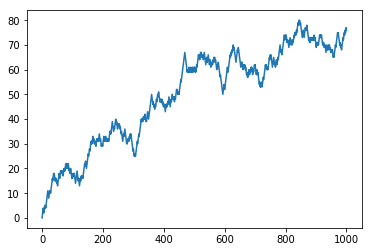

In [149]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
plt.plot(walk)

### 참고!! list compression을 이용함!!

In [151]:
import random

steps = 1000
s1 = [1 if random.randint(0,1) else -1 for _ in range(steps)]
walk = [sum(s1[:x]) for x in range(len(s1))] # 누적합 구한거네...
walk[:20]

[0, 1, 0, 1, 0, -1, 0, -1, -2, -1, 0, -1, -2, -1, -2, -3, -4, -5, -4, -5]

In [152]:
s1[:20]

[1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1]

In [153]:
walk[:20]

[0, 1, 0, 1, 0, -1, 0, -1, -2, -1, 0, -1, -2, -1, -2, -3, -4, -5, -4, -5]

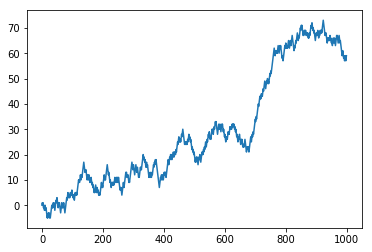

In [154]:
plt.plot(walk)

### numpy 이용함!!

In [155]:
np.random.seed(12345)

In [158]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps); draws[:20]

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0])

In [159]:
steps = np.where(draws > 0, 1, -1); steps[:20] # 0보다 크면 1 아니면 -1

array([ 1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,
        1, -1, -1])

In [160]:
walk = steps.cumsum(); walk[:20] # 1, -1 배열에서 올라갔나 내려갔다 하네, 그래서 계단 오르내리기!!

array([1, 0, 1, 2, 3, 4, 3, 2, 3, 4, 5, 4, 3, 2, 3, 4, 5, 6, 5, 4], dtype=int32)

In [161]:
walk.min()

-5

In [162]:
walk.max()

26

In [163]:
np.abs(walk) >= 10

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [180]:
(np.abs(walk) >= 10).argmax()

103

In [170]:
sum(np.abs(walk) >= 10)

285

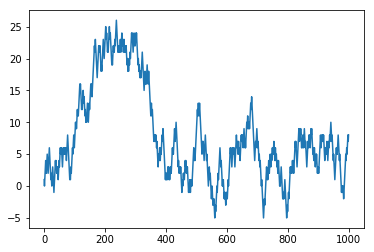

In [171]:
plt.plot(walk)

### Simulating many random walks at once, 시뮬레이션 반복함!!
역시 numpy를 이용해서 배열로 처리하겠다!!

In [239]:
nwalks = 5000
nsteps = 1000 # 1000계단 실험을 5000번 실행하겠다!! 
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis = 1)
walks = np.hstack((np.zeros((nwalks, 1), dtype=np.int32), walks))

In [203]:
np.zeros((nwalks, 1)) # 5000 x 1 짜리!! 

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])

In [204]:
walks

array([[  0,  -1,   0, ..., -76, -77, -76],
       [  0,   1,   0, ...,  14,  13,  14],
       [  0,  -1,   0, ..., -36, -35, -34],
       ..., 
       [  0,  -1,   0, ...,   4,   3,   4],
       [  0,   1,   0, ..., -58, -57, -56],
       [  0,   1,   2, ..., -40, -41, -40]])

In [205]:
print(walks.max()) # 5000번 시뮬레이션 한 것 중에서 최고치 뽑기
print(walks.min())

109
-121


In [216]:
hits30 = (np.abs(walks) >= 30).any(1 # 30계단 넘어서는 시점을 찾는 거임 위로든 아래로든!!
print(hits30)
print(len(hits30))

[ True False  True ..., False  True  True]
5000


In [217]:
hits30.sum() # Number that hit 30 or -30

3415

In [220]:
walks[1, :100] # 첫번째 시물레이션의 100개만

array([ 0,  1,  0, -1, -2, -1,  0,  1,  0,  1,  2,  3,  4,  3,  4,  5,  4,
        3,  2,  3,  4,  5,  4,  5,  4,  5,  6,  5,  4,  5,  6,  5,  4,  5,
        4,  3,  2,  3,  2,  3,  4,  5,  4,  3,  2,  1,  0, -1, -2, -3, -2,
       -3, -2, -1, -2, -3, -4, -3, -4, -3, -4, -3, -2, -1, -2, -1, -2, -3,
       -2, -1, -2, -3, -4, -5, -6, -5, -6, -5, -4, -3, -4, -3, -2, -3, -4,
       -3, -2, -3, -2, -3, -4, -5, -4, -5, -4, -3, -2, -1,  0, -1])

In [222]:
walks[hits30] # hits30 만족하는 실험만 뽑음

array([[  0,  -1,   0, ..., -76, -77, -76],
       [  0,  -1,   0, ..., -36, -35, -34],
       [  0,  -1,  -2, ..., -58, -59, -58],
       ..., 
       [  0,   1,   0, ..., -30, -31, -32],
       [  0,   1,   0, ..., -58, -57, -56],
       [  0,   1,   2, ..., -40, -41, -40]])

In [224]:
np.abs(walks[hits30]) # 절대값 취했네.. 

array([[ 0,  1,  0, ..., 76, 77, 76],
       [ 0,  1,  0, ..., 36, 35, 34],
       [ 0,  1,  2, ..., 58, 59, 58],
       ..., 
       [ 0,  1,  0, ..., 30, 31, 32],
       [ 0,  1,  0, ..., 58, 57, 56],
       [ 0,  1,  2, ..., 40, 41, 40]])

In [226]:
np.abs(walks[hits30]) >= 30 # 절대값 취한 것에서 30계단 넘어간것만 찾네!!

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ..., 
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]], dtype=bool)

In [228]:
(np.abs(walks[hits30]) >= 30).argmax(1)

array([258, 978, 432, ..., 554, 162, 182], dtype=int64)

In [232]:
print(len( (np.abs(walks[hits30]) >= 30).argmax(1) ))
print(len(np.abs(walks[hits30]) >= 30))

3415
3415


In [219]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
print(crossing_times) #  그 실험 마다의 최고값이 있는 열 번호를 써준거임!!
crossing_times.mean()

[258 978 432 ..., 554 162 182]


507.51390922401174

In [186]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))

In [187]:
steps

array([[ 0.40861248, -0.32729783, -0.07598692, ..., -0.51465747,
         0.08660511, -0.18995231],
       [-0.10025251,  0.41079586, -0.21702289, ...,  0.33010094,
         0.07208751, -0.08790892],
       [-0.12749371,  0.28901176,  0.07079566, ..., -0.0708202 ,
        -0.11238858,  0.51534309],
       ..., 
       [ 0.02618941, -0.22932112, -0.36159085, ...,  0.04953704,
        -0.15576326, -0.21673553],
       [-0.08874407,  0.01730654,  0.1282241 , ..., -0.03604634,
        -0.19405379,  0.26173956],
       [ 0.33297875, -0.15920614,  0.35518693, ...,  0.3292949 ,
        -0.25554234,  0.07494953]])